In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-simpsons-characters-dataset/weights.best.hdf5
/kaggle/input/the-simpsons-characters-dataset/annotation.txt
/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv
/kaggle/input/the-simpsons-characters-dataset/characters_illustration.png
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_28.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_42.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_6.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/lenny_leonard_22.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson_16.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_41.jpg
/kaggle/input/the-simpsons-characters-dat

In [2]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 13.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 80.7 MB/s eta 0:00:0000:0100:01


In [3]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
!pip install caer


In [5]:
!pip install canaro


In [6]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [7]:
IMG_SIZE = (80,80)
channels = 1
char_path = r"/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"

storing no. of imgs in dictionary

In [8]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
# sort in decending
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [9]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [10]:
#create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE = IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 1.1743924617767334s
[INFO] At 1000 files
[INFO] 1454 files found in 0.32904815673828125s
[INFO] At 1000 files
[INFO] 1452 files found in 0.3750483989715576s
[INFO] At 1000 files
[INFO] 1354 files found in 0.2276771068572998s
[INFO] At 1000 files
[INFO] 1342 files found in 0.22440600395202637s
[INFO] At 1000 files
[INFO] 1291 files found in 0.17400598526000977s
[INFO] At 1000 files
[INFO] 1206 files found in 0.07971048355102539s
[INFO] At 1000 files
[INFO] 1194 files found in 0.06176137924194336s
[INFO] At 1000 files
[INFO] 1193 files found in 0.05919384956359863s
[INFO] At 1000 files
[INFO] 1079 files found in 0.006014585494995117s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 3m 2s


In [11]:
len(train)

13811

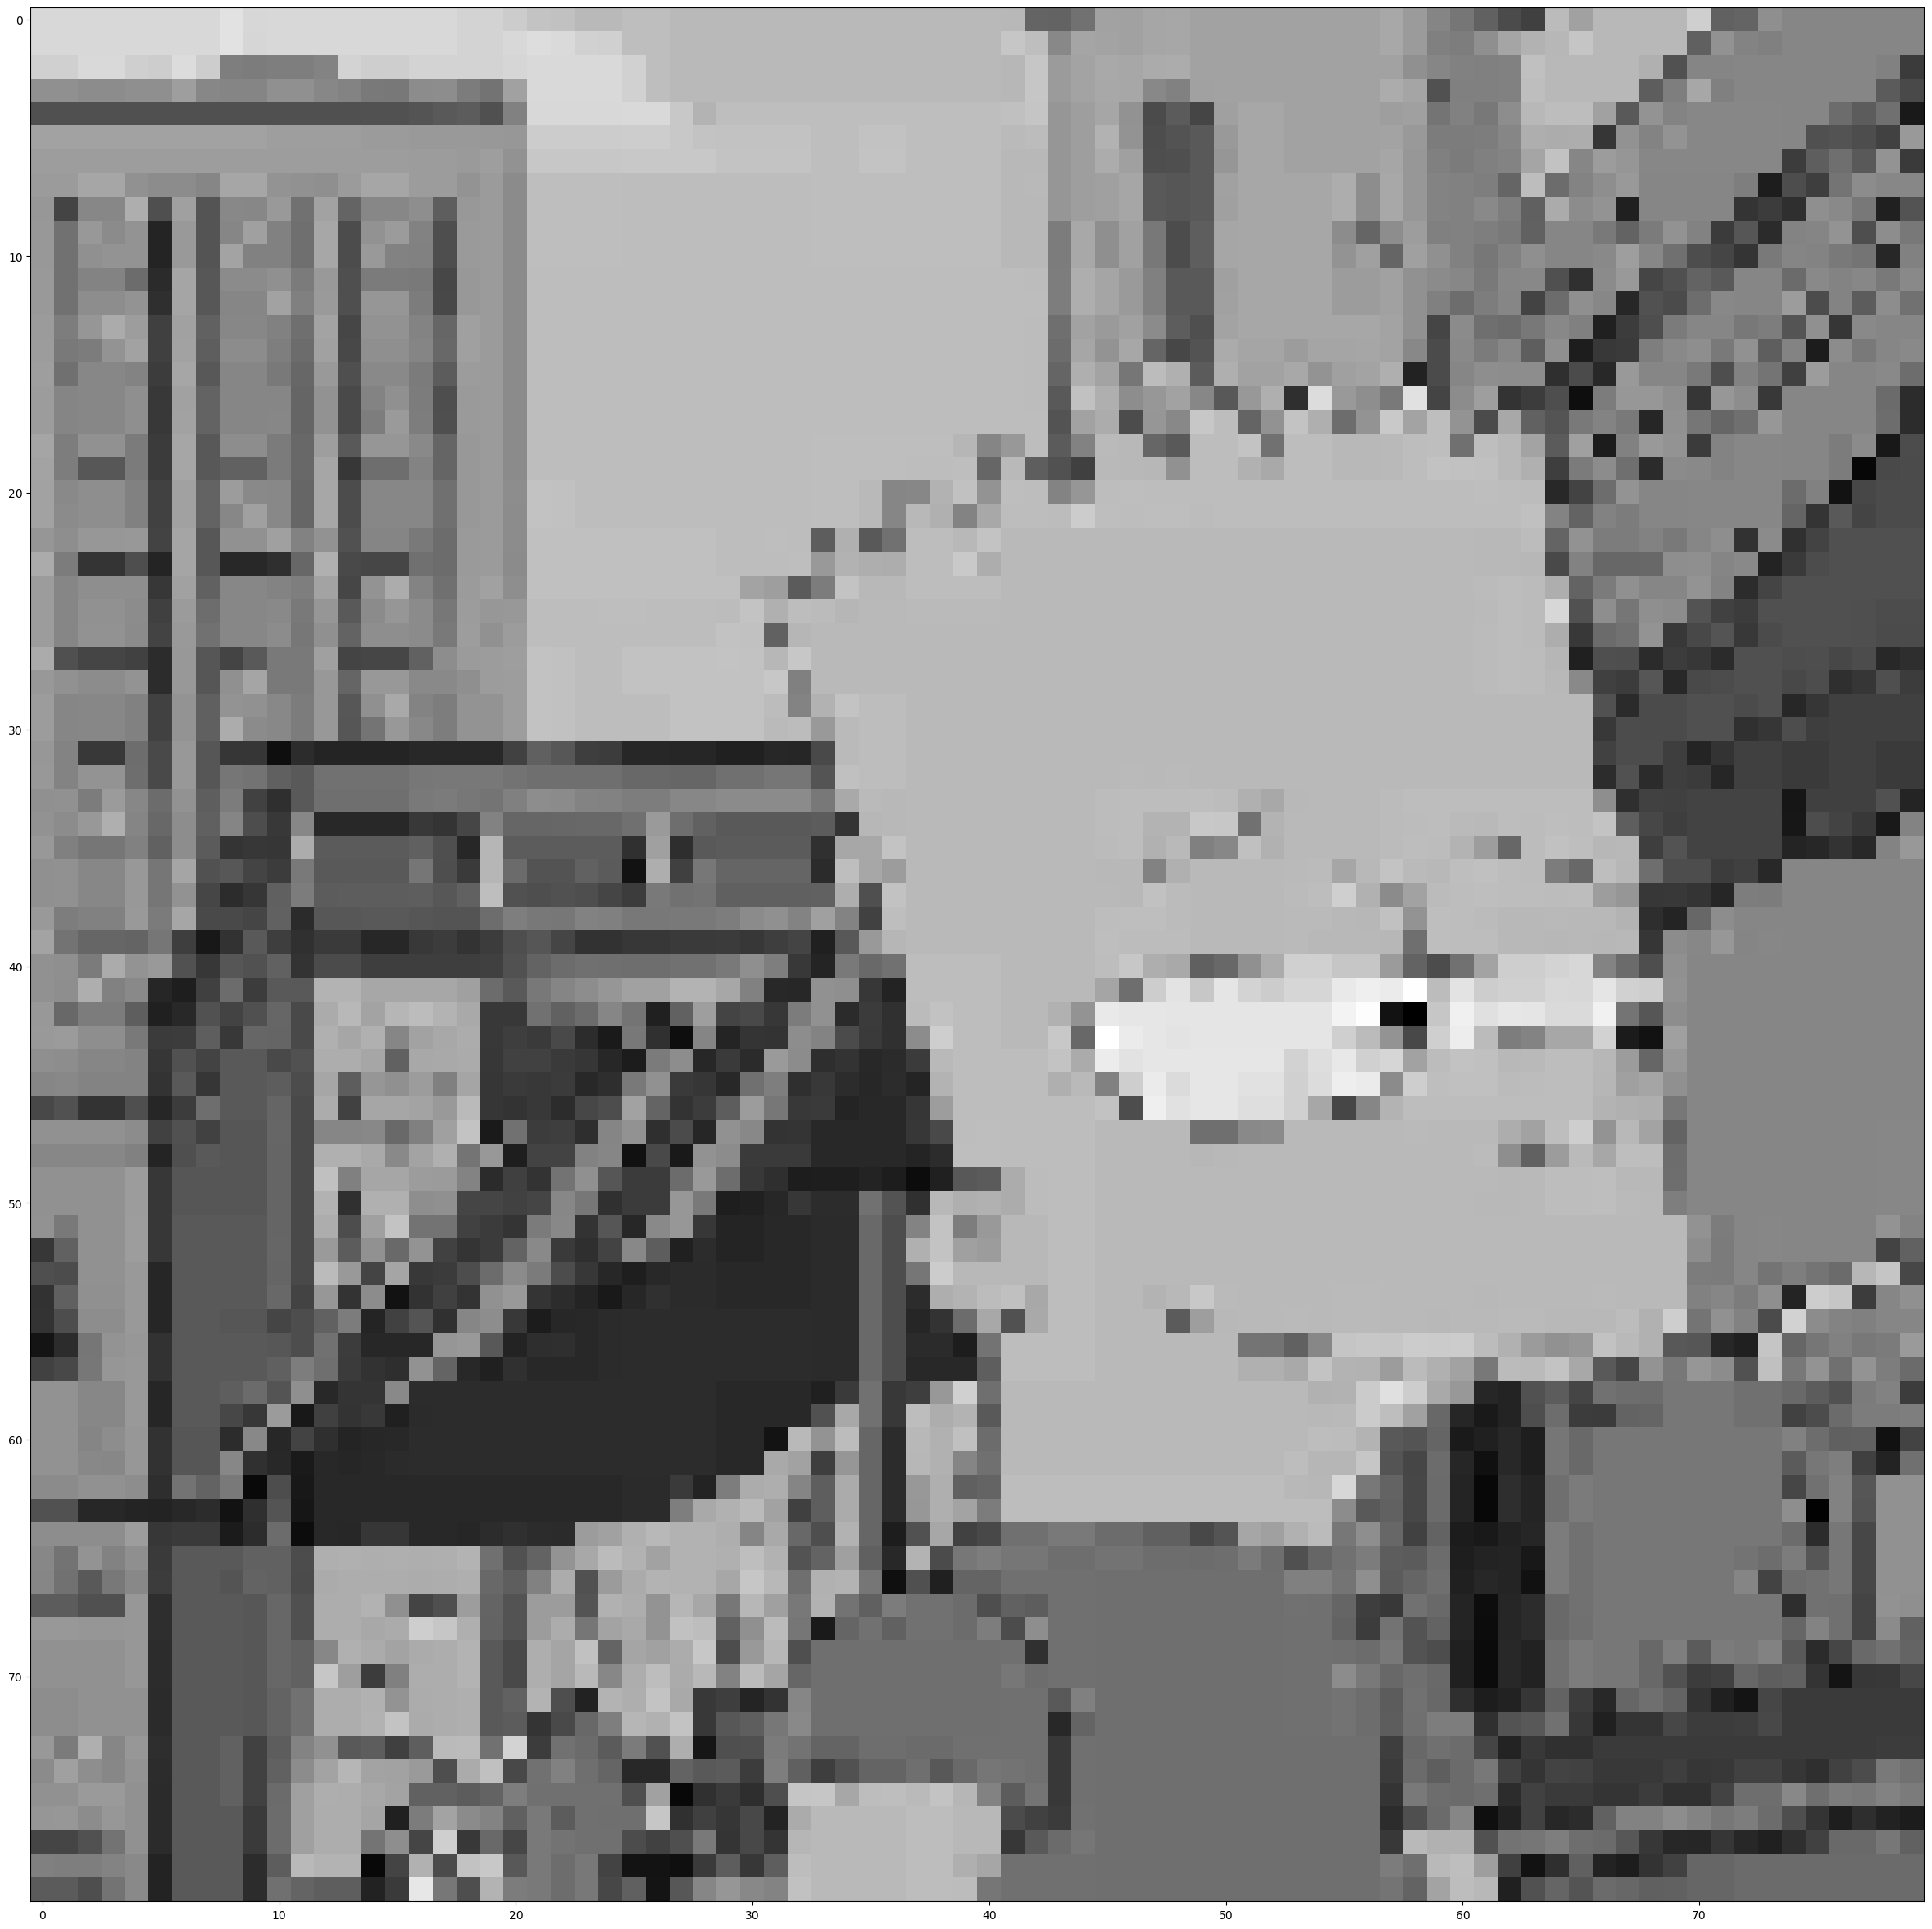

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [13]:
featureSet, labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [14]:
from tensorflow.python.keras.utils.np_utils import to_categorical

featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [15]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [16]:
del train
del featureSet
del labels
gc.collect()

0

In [17]:
BATCH_SIZE = 32

In [18]:
# Image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD

# IMG_SIZE = (80,80)
# LEARNING_RATE = 0.001
# DECAY = 1e-6
# MOMENTUM = .9
# EPOCHS = 5
# BATCH_SIZE = 32

def createSimpsonsModel(IMG_SIZE=(224,224), channels=1, output_dim=1, loss='binary_crossentropy', decay=None, learning_rate=None, momentum=None, nesterov=None):
    if not isinstance(output_dim, int):
        raise ValueError('[ERROR] Output dimensions need to be an integer')
    if not isinstance(channels, int):
        raise ValueError('[ERROR] Channels needs to be an integer')

    # # If 'channels first', update the input_shape
    # if backend.image_data_format() == 'channels_first':
    #     input_shape = (channels, img_size,img_size)
        
    w, h = IMG_SIZE[:2]
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h, channels)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu'))
    
    # Output Layer
    model.add(Dense(output_dim, activation='softmax'))

    optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum, nesterov=nesterov)

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [20]:
# Create our model (returns a compiled model)

model = createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9, nesterov=True)

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 39, 39, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 64)        36928     
                                                      

Now we have a working functional model

In [22]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [23]:
training = model.fit(train_gen, steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

NameError: name 'EPOCHS' is not defined

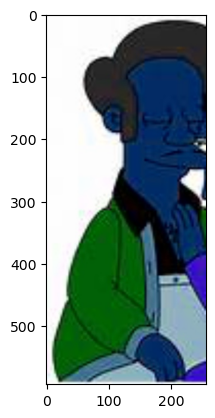

In [24]:
test_path=r"/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/apu_nahasapeemapetilon/pic_0004.jpg"
img = cv.imread(test_path)
plt.imshow(img)
plt.show()

In [25]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, 1)
    return img

In [26]:
predictions = model.predict(prepare(img))

1/1 [==============================] - 10s 10s/step


In [27]:
print(characters[np.argmax(predictions[0])])

milhouse_van_houten
